<a href="https://colab.research.google.com/github/makropolecenia/Book/blob/master/SCRAPER_OXFORD_MAIL_28_06_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SCRAPER ZRÓDŁA OXFORD (OxCGRT/covid-policy-tracker) -19 WSKAZNIKOW W PLIKU ZBIORCZYM CSV 

 STAN NA 26.06.2021

UWAGI - DO ROZWIAZANIA:  

W PLIKU CSV ZBIORCZYM OxCGRT_latest.csv 
DLA KRAJU ID 29 (WIELKA BRYTANIA) JEST DOSTEPNYCH 5 REKORDÓW, DLA POZOSTAŁYCH KRAJÓW 1 REKORD. DO BAZY MOZE TRAFIĆ TYLKO JEDEN REKORD

W PLIKU CSV ZNAJDUJE SIĘ CAŁA HISTORIA, DO BAZY WPROWADZIMY TYLKO NAJBARDZIEJ AKTUALNE (NOWE REKORDY) WYMAGA TO SPRAWDZENIA MAXDATY REKORDÓW JUZ ZAPISANYCH W BAZIE 

CZY PLIK CSV JEST AKTUALIZOWANY WSTECZNIE?
ZWŁASZCZA WSKAZNIKI KWOTOWE NP 32003000000

31001000000	Zamknięcie szkół

31002000000	Zamknięcie miejsc pracy

31003000000	Odwołanie wydarzeń publicznych

31004000000	Ograniczenia zgromadzeń

31005000000	Zamknięcie transportu publicznego

31006000000	Wymaganie pozostania w domach

31007000000	Ograniczenia przemieszczania się pomiędzy regionami

31008000000	Kontrola podróży międzynarodowych

31009000000	Zasłanianie twarzy

32001000000	Zapomogi

32002000000	Ulgi kredytowe

32003000000	Środki fiskalne

32004000000	Wsparcie międzynarodowe

33001000000	Kampanie informacyjne

33002000000	Polityka testowania

33003000000	Śledzenie kontaktów

33004000000	Kryzysowe wsparcie służby zdrowia

33005000000	Inwestycja w badania nad szczepionkami

33101000000	Polityka szczepień


MAPOWANIE DOSTEPNYCH DANYCH NA WSKAZNIKI W BAZIE BDM_COVID_EDIT

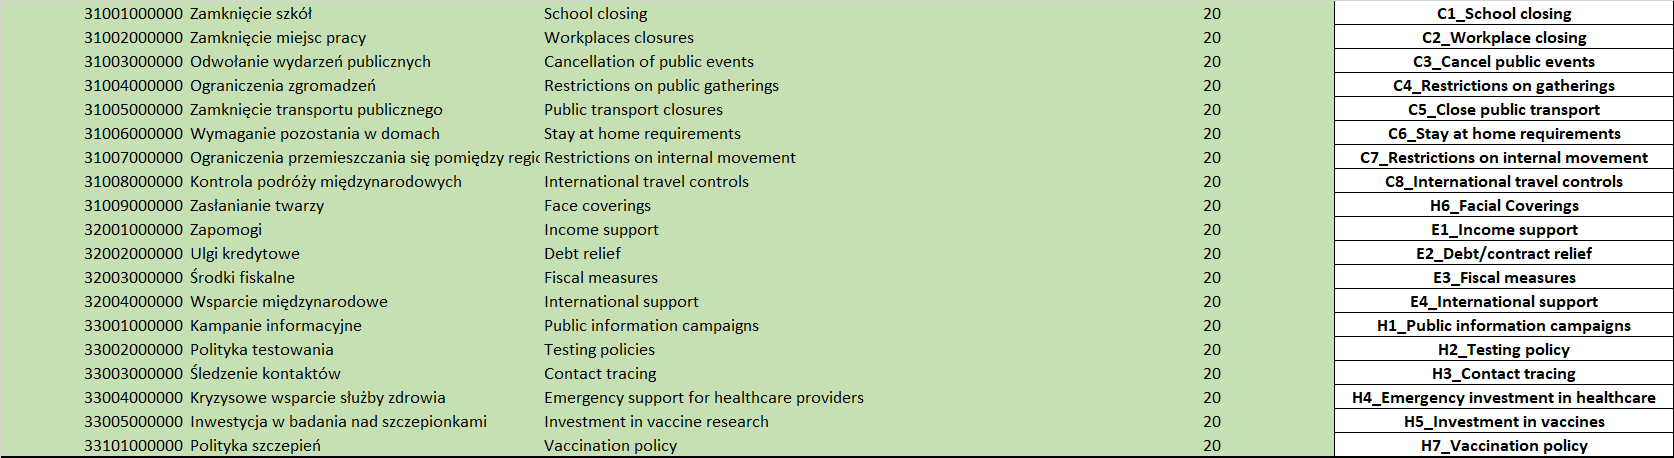

GITHUB - ADRESY URL DO PLIKÓW CSV

In [ ]:
https://github.com/OxCGRT/covid-policy-tracker/tree/master/data

In [ ]:
##DANE AKTUALIZOWANE - ZBIORCZE - DOSTEPNE PLIKI 

OxCGRT_latest.csv

OxCGRT_latest_allchanges.csv

OxCGRT_latest_combined.csv

OxCGRT_latest_responses.csv

OxCGRT_latest_withnotes.csv

OxCGRT_vaccines_full.csv 

In [ ]:
https://github.com/OxCGRT/covid-policy-tracker/tree/master/data/timeseries

In [ ]:

##DANE AKTUALIZOWANE - SERIE CZASOWE - DOSTEPNE PLIKI 

OxCGRT_timeseries_all.xlsx

c1_flag.csv

c1_school_closing.csv

c2_flag.csv

c2_workplace_closing.csv

c3_cancel_public_events.csv

c3_flag.csv

c4_flag.csv

c4_restrictions_on_gatherings.csv

c5_close_public_transport.csv

c5_flag.csv

c6_flag.csv

c6_stay_at_home_requirements.csv

c7_flag.csv

c7_movementrestrictions.csv

c8_internationaltravel.csv


confirmed_cases.csv

confirmed_deaths.csv

containment_health_index.csv


e1_flag.csv

e1_income_support.csv

e2_debtrelief.csv

economic_support_index.csv

government_response_index.csv


h1_flag.csv

h1_public_information_campaigns.csv

h2_testing_policy.csv

h3_contact_tracing.csv


h6_facial_coverings.csv

h6_flag.csv

h7_flag.csv

h7_vaccination_policy.csv

h8_flag.csv

h8_protection_of_elderly_people.csv


stringency_index.csv


SCRAPER Z PLIKU ZBIORCZEGO - OxCGRT_latest.csv

In [ ]:
import pandas as pd

#DANE AKTUALIZOWANE - ZBIORCZE - PLIK OxCGRT_latest.csv


data_url = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv'

data = pd.read_csv(data_url)

print(data.head())

#data.to_excel('TEST_POBORU_PLIKU_OXFORD7_ZBIORCZY_DO_BAZY_OUTPUT.xlsx') 

data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


  CountryName CountryCode  ... EconomicSupportIndex EconomicSupportIndexForDisplay
0       Aruba         ABW  ...                  0.0                            0.0
1       Aruba         ABW  ...                  0.0                            0.0
2       Aruba         ABW  ...                  0.0                            0.0
3       Aruba         ABW  ...                  0.0                            0.0
4       Aruba         ABW  ...                  0.0                            0.0

[5 rows x 51 columns]


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,H8_Protection of elderly people,H8_Flag,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170035,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44306.0,1709.0,NaN,67.59,NaN,70.24,NaN,48.96,NaN,55.95,NaN,0.0
170036,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45217.0,1721.0,NaN,67.59,NaN,70.24,NaN,48.96,NaN,55.95,NaN,0.0
170037,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46018.0,1725.0,NaN,67.59,NaN,70.24,NaN,48.96,NaN,55.95,NaN,0.0
170038,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46442.0,1736.0,NaN,67.59,NaN,70.24,NaN,48.96,NaN,55.95,NaN,0.0


In [ ]:
#pobranie odpowiednich kolumn do dalszego przetwarzania 


data2 = data[['Date','CountryCode','C1_School closing','C2_Workplace closing','C3_Cancel public events','C4_Restrictions on gatherings','C5_Close public transport','C6_Stay at home requirements','C7_Restrictions on internal movement','C8_International travel controls','E1_Income support','E2_Debt/contract relief','E3_Fiscal measures','E4_International support','H1_Public information campaigns','H2_Testing policy','H3_Contact tracing','H4_Emergency investment in healthcare','H5_Investment in vaccines','H6_Facial Coverings','H7_Vaccination policy','H8_Protection of elderly people']]

data2

#ograniczenie listy, wyfiltrowanie listy potrzebnych krajów


data3 = data2[data['CountryCode'].isin(['POL','AUT','BEL','BGR','HRV','CYP','CZE','DNK','EST','FIN','FRA','GRC','ESP','NLD','IRL','LTU','LUX','LVA','DEU','PRT','ROU','SVK','SVN','SWE','HUN','GBR','ITA'])]

#data3.to_excel('SCRAPER_OXFORD_SPRAWDZENIE_WARTOSCI_NA_WEJSCIU.xlsx')

data3

,Date,CountryCode,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,E1_Income support,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H7_Vaccination policy,H8_Protection of elderly people
4360,20200101,AUT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4361,20200102,AUT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4362,20200103,AUT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4363,20200104,AUT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4364,20200105,AUT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126980,20210624,SWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126981,20210625,SWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126982,20210626,SWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126983,20210627,SWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#unpivot dataframu na wielu wskaznikach

df_unpivoted = data3.melt(id_vars=['Date','CountryCode' ], var_name='var_name', value_name='value_name')

df_unpivoted



,Date,CountryCode,var_name,value_name
0,20200101,AUT,C1_School closing,0.0
1,20200102,AUT,C1_School closing,0.0
2,20200103,AUT,C1_School closing,0.0
3,20200104,AUT,C1_School closing,0.0
4,20200105,AUT,C1_School closing,0.0
...,...,...,...,...
337895,20210624,SWE,H8_Protection of elderly people,NaN
337896,20210625,SWE,H8_Protection of elderly people,NaN
337897,20210626,SWE,H8_Protection of elderly people,NaN
337898,20210627,SWE,H8_Protection of elderly people,NaN


In [ ]:
#WPROWADZENIE SŁOWNIKÓW

#słownik etykieta : wskaznik

dict2={

"C1_School closing":"31001000000",
"C2_Workplace closing":"31002000000",
"C3_Cancel public events":"31003000000",
"C4_Restrictions on gatherings":"31004000000",
"C5_Close public transport":"31005000000",
"C6_Stay at home requirements":"31006000000",
"C7_Restrictions on internal movement":"31007000000",
"C8_International travel controls":"31008000000",
"H6_Facial Coverings":"31009000000",
"E1_Income support":"32001000000",
"E2_Debt/contract relief":"32002000000",
"E3_Fiscal measures":"32003000000",
"E4_International support":"32004000000",
"H1_Public information campaigns":"33001000000",
"H2_Testing policy":"33002000000",
"H3_Contact tracing":"33003000000",
"H4_Emergency investment in healthcare":"33004000000",
"H5_Investment in vaccines":"33005000000",
"H7_Vaccination policy":"33101000000"}

print (len (dict2))



19


In [ ]:
#WPROWADZENIE SŁOWNIKÓW

#słownik symbol kraju : id_teryt


dict3 ={

            #'0':'0',
            #'EU28':'1',
            #'EU27_2020':'2',
        
            'POL':'3',
            'AUT':'4',
            'BEL':'5',
            'BGR':'6',
            'HRV':'7',
            'CYP':'8',
            'CZE':'9',
            'DNK':'10',
            'EST':'11',
            'FIN':'12',
            'FRA':'13',
            'GRC':'14',
            'ESP':'15',
            'NLD':'16',
            'IRL':'17',
            'LTU':'18',
            'LUX':'19',
            'LVA':'20',
            #'MT':'21',
            'DEU':'22',
            'PRT':'23',
            'ROU':'24',
            'SVK':'25',
            'SVN':'26',
            'SWE':'27',
            'HUN':'28',
            'GBR':'29',
            'ITA':'30'}

print (len (dict3))

27


In [ ]:
#mapowanie kolumny z symbolami krajów na id_teryt


dict3 ={

            #'0':'0',
            #'EU28':'1',
            #'EU27_2020':'2',
        
            'POL':'3',
            'AUT':'4',
            'BEL':'5',
            'BGR':'6',
            'HRV':'7',
            'CYP':'8',
            'CZE':'9',
            'DNK':'10',
            'EST':'11',
            'FIN':'12',
            'FRA':'13',
            'GRC':'14',
            'ESP':'15',
            'NLD':'16',
            'IRL':'17',
            'LTU':'18',
            'LUX':'19',
            'LVA':'20',
            #'MT':'21',
            'DEU':'22',
            'PRT':'23',
            'ROU':'24',
            'SVK':'25',
            'SVN':'26',
            'SWE':'27',
            'HUN':'28',
            'GBR':'29',
            'ITA':'30'}


df_unpivoted['CountryCode']=df_unpivoted['CountryCode'].map(dict3)

df_unpivoted



,Date,CountryCode,var_name,value_name
0,20200101,4,C1_School closing,0.0
1,20200102,4,C1_School closing,0.0
2,20200103,4,C1_School closing,0.0
3,20200104,4,C1_School closing,0.0
4,20200105,4,C1_School closing,0.0
...,...,...,...,...
337895,20210624,27,H8_Protection of elderly people,NaN
337896,20210625,27,H8_Protection of elderly people,NaN
337897,20210626,27,H8_Protection of elderly people,NaN
337898,20210627,27,H8_Protection of elderly people,NaN


In [ ]:
#mapowanie kolumny etykiety wskaznika na id_wskaznika


dict2={

"C1_School closing":"31001000000",
"C2_Workplace closing":"31002000000",
"C3_Cancel public events":"31003000000",
"C4_Restrictions on gatherings":"31004000000",
"C5_Close public transport":"31005000000",
"C6_Stay at home requirements":"31006000000",
"C7_Restrictions on internal movement":"31007000000",
"C8_International travel controls":"31008000000",
"H6_Facial Coverings":"31009000000",
"E1_Income support":"32001000000",
"E2_Debt/contract relief":"32002000000",
"E3_Fiscal measures":"32003000000",
"E4_International support":"32004000000",
"H1_Public information campaigns":"33001000000",
"H2_Testing policy":"33002000000",
"H3_Contact tracing":"33003000000",
"H4_Emergency investment in healthcare":"33004000000",
"H5_Investment in vaccines":"33005000000",
"H7_Vaccination policy":"33101000000"}


df_unpivoted['var_name']=df_unpivoted['var_name'].map(dict2)

df_unpivoted

,Date,CountryCode,var_name,value_name
0,20200101,4,31001000000,0.0
1,20200102,4,31001000000,0.0
2,20200103,4,31001000000,0.0
3,20200104,4,31001000000,0.0
4,20200105,4,31001000000,0.0
...,...,...,...,...
337895,20210624,27,NaN,NaN
337896,20210625,27,NaN,NaN
337897,20210626,27,NaN,NaN
337898,20210627,27,NaN,NaN


In [ ]:
#formatowanie daty

#df.dtypes

df_unpivoted.dtypes

df_unpivoted['Date'] = pd.to_datetime(
                          df_unpivoted['Date'],
                          format='%Y%m%d')

df_unpivoted

,Date,CountryCode,var_name,value_name
0,2020-01-01,4,31001000000,0.0
1,2020-01-02,4,31001000000,0.0
2,2020-01-03,4,31001000000,0.0
3,2020-01-04,4,31001000000,0.0
4,2020-01-05,4,31001000000,0.0
...,...,...,...,...
337895,2021-06-24,27,NaN,NaN
337896,2021-06-25,27,NaN,NaN
337897,2021-06-26,27,NaN,NaN
337898,2021-06-27,27,NaN,NaN


In [ ]:
# sprawdzenie formatu danych kolumn

df_unpivoted.dtypes

Date           datetime64[ns]
CountryCode            object
var_name               object
value_name            float64
dtype: object

In [ ]:
#uporzadkowanie kolejnosci kolumn do dalszego przetwarzania 

data=df_unpivoted[['value_name','Date','var_name','CountryCode']]

data

,value_name,Date,var_name,CountryCode
0,0.0,2020-01-01,31001000000,4
1,0.0,2020-01-02,31001000000,4
2,0.0,2020-01-03,31001000000,4
3,0.0,2020-01-04,31001000000,4
4,0.0,2020-01-05,31001000000,4
...,...,...,...,...
337895,NaN,2021-06-24,NaN,27
337896,NaN,2021-06-25,NaN,27
337897,NaN,2021-06-26,NaN,27
337898,NaN,2021-06-27,NaN,27


In [ ]:
# usuniecie wierszy z wartoscią NAN gdziekolwiek jest

data = data.dropna()

data

,value_name,Date,var_name,CountryCode
0,0.0,2020-01-01,31001000000,4
1,0.0,2020-01-02,31001000000,4
2,0.0,2020-01-03,31001000000,4
3,0.0,2020-01-04,31001000000,4
4,0.0,2020-01-05,31001000000,4
...,...,...,...,...
320991,4.0,2021-06-15,33101000000,27
320992,4.0,2021-06-16,33101000000,27
320993,4.0,2021-06-17,33101000000,27
320994,4.0,2021-06-18,33101000000,27


In [ ]:
#UTWORZENIE PEŁNEGO REKORDU DO BAZY 

import pandas as pd

pd.options.mode.chained_assignment = None 

data.rename(columns = {'value_name':'wartosc'}, inplace = True) 
data.rename(columns = {'Date':'data1'}, inplace = True) 
data.rename(columns = {'var_name':'id_wskaznik1'}, inplace = True) 

data.rename(columns = {'CountryCode':'id_teryt'}, inplace = True) 


decimals=4

data['wartosc'] = data['wartosc'].apply(lambda x: round(x, decimals)) #zaokraglenie 4 miejsca po przecinku 

print ('data')
print(data)

data['data_wprowadzenia'] = pd .datetime .now ().replace (hour =0 ,minute =0 ,second =0 ,microsecond =0 )
data['data_modyfikacji'] = pd .datetime .now ().replace (hour =0 ,minute =0 ,second =0 ,microsecond =0 )

data ['id_komentarz'] ='1'
data ['id_wprowadzajacego'] ='11'
data ['id_modyfikujacego'] ='11'

data ['data'] = data ['data1'] 
data ['id_zrodlo'] ='20' # DLA OXFORDU ZAWSZE 20

data ['id_wskaznik'] = data ['id_wskaznik1']

print ('data')
print(data)

data2 = data[['wartosc','data_wprowadzenia','data_modyfikacji','id_komentarz','id_wprowadzajacego','id_modyfikujacego','id_teryt','data','id_zrodlo','id_wskaznik']]

print ('data2')
print(data2)

data3 = data2[data2["data"].isin(pd.date_range('1990-01-01', '2021-12-31'))] # wyfiltrowane rekordy dla zakresu dat, można zmienic np dla ostatnich kilku dni   

data3.to_excel('SCRAPER_OXFORD_OUTPUT.xlsx')

print ('data3 - output')
print(data3)

print (" zakonczenie programu ")

data3

data
        wartosc      data1  ... id_wprowadzajacego id_modyfikujacego
0           0.0 2020-01-01  ...                 11                11
1           0.0 2020-01-02  ...                 11                11
2           0.0 2020-01-03  ...                 11                11
3           0.0 2020-01-04  ...                 11                11
4           0.0 2020-01-05  ...                 11                11
...         ...        ...  ...                ...               ...
320991      4.0 2021-06-15  ...                 11                11
320992      4.0 2021-06-16  ...                 11                11
320993      4.0 2021-06-17  ...                 11                11
320994      4.0 2021-06-18  ...                 11                11
320995      4.0 2021-06-19  ...                 11                11

[316795 rows x 14 columns]
data
        wartosc      data1  ... id_wprowadzajacego id_modyfikujacego
0           0.0 2020-01-01  ...                 11               

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


data3 - output
        wartosc data_wprowadzenia  ... id_zrodlo  id_wskaznik
0           0.0        2021-06-28  ...        20  31001000000
1           0.0        2021-06-28  ...        20  31001000000
2           0.0        2021-06-28  ...        20  31001000000
3           0.0        2021-06-28  ...        20  31001000000
4           0.0        2021-06-28  ...        20  31001000000
...         ...               ...  ...       ...          ...
320991      4.0        2021-06-28  ...        20  33101000000
320992      4.0        2021-06-28  ...        20  33101000000
320993      4.0        2021-06-28  ...        20  33101000000
320994      4.0        2021-06-28  ...        20  33101000000
320995      4.0        2021-06-28  ...        20  33101000000

[316795 rows x 10 columns]
 zakonczenie programu 


,wartosc,data_wprowadzenia,data_modyfikacji,id_komentarz,id_wprowadzajacego,id_modyfikujacego,id_teryt,data,id_zrodlo,id_wskaznik
0,0.0,2021-06-28,2021-06-28,1,11,11,4,2020-01-01,20,31001000000
1,0.0,2021-06-28,2021-06-28,1,11,11,4,2020-01-02,20,31001000000
2,0.0,2021-06-28,2021-06-28,1,11,11,4,2020-01-03,20,31001000000
3,0.0,2021-06-28,2021-06-28,1,11,11,4,2020-01-04,20,31001000000
4,0.0,2021-06-28,2021-06-28,1,11,11,4,2020-01-05,20,31001000000
...,...,...,...,...,...,...,...,...,...,...
320991,4.0,2021-06-28,2021-06-28,1,11,11,27,2021-06-15,20,33101000000
320992,4.0,2021-06-28,2021-06-28,1,11,11,27,2021-06-16,20,33101000000
320993,4.0,2021-06-28,2021-06-28,1,11,11,27,2021-06-17,20,33101000000
320994,4.0,2021-06-28,2021-06-28,1,11,11,27,2021-06-18,20,33101000000


KONIEC SCRAPERA :)